<a href = "https://www.pieriantraining.com"><img src="../PT Centered Purple.png"> </a>

<em style="text-align:center">Copyrighted by Pierian Training</em>

# Multi-Modal: Image, Text, and Tabular

Now let's combine all data types, literal png images, natural language text, and any normal tabular data (numeric, strings, etc.)

Note, this is a very computational heavy demand task, you will probably want to run this on either a GPU or on some sort of cloud provider!

## Data

We will be using a modified version of the PetFinder dataset:
https://www.kaggle.com/c/petfinder-adoption-prediction

This data includes a lot of information, including multi-modal information:

* Natural Language Text Data
    * Description of the Pet
* Image Data
    * File paths to images of the Pets
* Tabular Data
    * All the other data points (numeric and object)
    
**Data Features**

* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

    
**LABEL FOR PREDICTION**    

We will attempt to predict the adoption speed of the animal, which the shelter has classified into two categories:
* 0 - Adopted more than 10 days after listing (slow adoption)
* 1 - Adopted less than 10 days after listing (fast adoption)

In [1]:
from autogluon.tabular import TabularDataset

In [2]:
data = TabularDataset('data/petfinder/data.csv')

In [3]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,2,1,3,2,1,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,I rescued Yumi Hamasaki at a food stall far aw...,7d7a39d71,3.0,0,images/7d7a39d71-1.jpg
1,2,Nene/ Kimie,12,285,0,2,5,6,7,2,3,2,2,2,1,1,0,41326,f0450bf0efe0fa3ff9321d0b827b1237,0,Has adopted by a friend with new pet name Kimie,0e107c82f,3.0,0,images/0e107c82f-1.jpg
2,2,Mattie,12,266,0,2,1,7,0,2,1,1,1,1,1,1,0,41401,9b52af6d48a4521fd01d4028eb5879a3,0,I rescued Mattie with a broken leg. After surg...,1a8fd6707,5.0,0,images/1a8fd6707-1.jpg
3,1,NaN,1,189,307,2,1,2,0,2,1,1,1,2,1,1,0,41401,88da1210e021a5cf43480b074778f3bc,0,She born on 30 September . I really hope the a...,bca8b44ae,3.0,0,images/bca8b44ae-1.jpg
4,2,Coco,6,276,285,2,2,4,7,2,2,1,1,2,1,1,100,41326,227d7b1bcfaffb5f9882bf57b5ee8fab,0,Calico Tame and easy going Diet RC Kitten Supp...,2def67952,1.0,0,images/2def67952-1.jpg


### Image File Paths
We'll need to insert the full file paths for training. We can use the os module for this with some pandas calls:

In [4]:
import os

In [8]:
# Reports Current Working Directory
os.getcwd()

'C:\\Users\\Marcial\\Pierian-Data-Courses\\AutoGluon-Course\\01-Multi-Modal'

In [9]:
# Our Data Directory:
data_dir = '\\data\\petfinder\\'
# MacOS or LINUX Users should use / instead of two \\
# data_dir = '/data/petfinder/'

In [10]:
def full_image_path(image_file):
    return os.getcwd()+data_dir+image_file

In [12]:
data['Images'] = data['Images'].apply(full_image_path)

In [13]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,2,1,3,2,1,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,I rescued Yumi Hamasaki at a food stall far aw...,7d7a39d71,3.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
1,2,Nene/ Kimie,12,285,0,2,5,6,7,2,3,2,2,2,1,1,0,41326,f0450bf0efe0fa3ff9321d0b827b1237,0,Has adopted by a friend with new pet name Kimie,0e107c82f,3.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
2,2,Mattie,12,266,0,2,1,7,0,2,1,1,1,1,1,1,0,41401,9b52af6d48a4521fd01d4028eb5879a3,0,I rescued Mattie with a broken leg. After surg...,1a8fd6707,5.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
3,1,NaN,1,189,307,2,1,2,0,2,1,1,1,2,1,1,0,41401,88da1210e021a5cf43480b074778f3bc,0,She born on 30 September . I really hope the a...,bca8b44ae,3.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
4,2,Coco,6,276,285,2,2,4,7,2,2,1,1,2,1,1,100,41326,227d7b1bcfaffb5f9882bf57b5ee8fab,0,Calico Tame and easy going Diet RC Kitten Supp...,2def67952,1.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...


### Confirm Images 

In [14]:
from IPython.display import Image, display

In [24]:
pil_img = Image(filename=data['Images'][100])

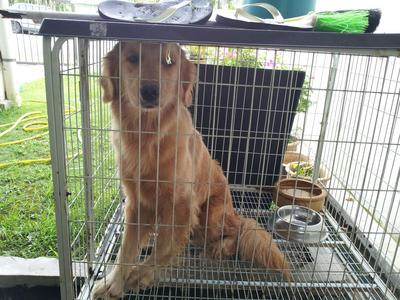

In [25]:
display(pil_img)

There is no need to do any preprocessing, resizing, or feature engineering on the images, AutoGluon does that for you.

## Train Test Split

In [26]:
len(data)

700

In [28]:
train_data = data.sample(600)
test_data = data.drop(train_data.index)

In [29]:
train_data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
530,2,Abu & Atan,5,300,299,1,1,2,7,2,1,2,2,2,1,2,0,41401,8e983ee25c1e67b1b0fa479c32708235,0,A kitten that come to my house and i feed them...,6a3607d09,2.0,1,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
323,2,"Do,Re,Mi,Fa,So And La",6,265,0,3,6,7,0,2,2,1,1,1,1,7,0,41336,3c5ed28b83503760894a4c2761bb7a18,0,Their mum was throw away when they just arrive...,6d089036f,5.0,1,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
8,2,Ovaltine,2,265,0,2,2,0,0,3,2,2,1,3,1,1,0,41326,167119eeb94dec6c615c602952c527c8,0,Ovaltine kisahnya sama saja dengan VICO kerana...,2b2ec33ac,2.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
147,1,Simba,82,189,0,1,1,0,0,3,1,1,1,1,1,1,300,41326,20e79a294bb929f425376c8e54e1df51,0,"I have had Simba since a puppy, a beautiful lo...",b9086e44f,3.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
421,2,Mitten,10,266,0,2,1,6,7,1,1,1,1,2,1,1,50,41401,7115edcb78afd06e50e496cd56930c89,0,Pregnant mother.We are looking for someone to ...,534fff3cf,1.0,1,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...


In [30]:
test_data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,2,1,3,2,1,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,I rescued Yumi Hamasaki at a food stall far aw...,7d7a39d71,3.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
6,2,Three Little Kittens - Tabby,3,266,299,2,2,6,0,2,1,2,2,2,1,1,0,41326,2922723f8889855551615e8d22f1e0b4,0,A mama cat (stray) recently gave birth to thre...,cb568959e,9.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
12,2,(No Name - She Is Just A Stray),4,298,0,2,4,5,7,1,1,2,2,2,2,1,0,41401,45d7d1d5298837ceeba14bb268a207d1,0,She is just a stray.. Anyone who love cat can ...,80bee180a,2.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
13,1,YUMI,5,307,0,2,1,2,7,2,2,1,1,2,1,1,150,41327,9153070cde2f487d2ab65e0bd114eb1d,1,"YUMI is a approx 5 month old little angel, she...",86629a3ee,2.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...
15,1,3 Male Black Pups,2,307,0,1,1,0,0,2,1,2,2,2,1,3,0,41326,5788b8639ed178795510a8cbe72ccc28,0,These pups have been adopted. Profile created ...,435bb3995,1.0,0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...


In [52]:
print(test_data['Description'][0])

I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to move to a new house where no pets are allowed :( As Yumi is very2 special to me, i will only give her to ppl that i think could take care of her just like i did (especially on her foods things)..


In [31]:
label_col = 'AdoptionSpeed'

## Training Multi-Modal Predictor

We'll put a cut-off time limit, since this will take hours if we dont!

Note that this will download the SwinTransformer model if you haven't downloaded it already from a previous training run.

In [32]:
from autogluon.multimodal import MultiModalPredictor

In [33]:
predictor = MultiModalPredictor(label=label_col)
predictor.fit(
    train_data=train_data,
    time_limit=15*60, # seconds
)

Global seed set to 123
No path specified. Models will be saved in: "AutogluonModels\ag-20230405_232059\"
AutoMM starts to create your model. ✨

- Model will be saved to "C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\01-Multi-Modal\AutogluonModels\ag-20230405_232059".

- Validation metric is "roc_auc".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\01-Multi-Modal\AutogluonModels\ag-20230405_232059
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai

C:\Users\Marcial\AppData\Roaming\Python\Python39\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 1: 'val_roc_auc' reached 0.50933 (best 0.50933), saving model to 'C:\\Users\\Marcial\\Pierian-Data-Courses\\AutoGluon-Course\\01-Multi-Modal\\AutogluonModels\\ag-20230405_232059\\epoch=0-step=1.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 4: 'val_roc_auc' reached 0.65414 (best 0.65414), saving model to 'C:\\Users\\Marcial\\Pierian-Data-Courses\\AutoGluon-Course\\01-Multi-Modal\\AutogluonModels\\ag-20230405_232059\\epoch=0-step=4.ckpt' as top 3
Time limit reached. Elapsed time is 0:15:23. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 4: 'val_roc_auc' reached 0.65414 (best 0.65414), saving model to 'C:\\Users\\Marcial\\Pierian-Data-Courses\\AutoGluon-Course\\01-Multi-Modal\\AutogluonModels\\ag-20230405_232059\\epoch=1-step=4.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\01-Multi-Modal\AutogluonModels\ag-20230405_232059")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\01-Multi-Modal\AutogluonModels\ag-20230405_232059
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon




## Evaluation and Predictions

In [34]:
scores = predictor.evaluate(test_data, metrics=["roc_auc","acc",'f1'])
scores

Predicting: 0it [00:00, ?it/s]

{'roc_auc': 0.6196775527077305, 'acc': 0.62, 'f1': 0.703125}

Predict on a few test examples:

In [35]:
first_five_test_features = test_data.drop(columns=label_col)[:5]
predictions = predictor.predict(first_five_test_features)
predictions

0     0
6     0
12    1
13    1
15    0
Name: AdoptionSpeed, dtype: int64

Just like before, we can also do probabilities:

In [36]:
first_five_test_features = test_data.drop(columns=label_col)[:5]
predictions = predictor.predict_proba(first_five_test_features)
predictions

,0,1
0,0.770758,0.229242
6,0.662228,0.337772
12,0.465739,0.534261
13,0.306018,0.693982
15,0.523368,0.476632
